# Notebook to inspect the correlations between different columns in our dataset

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

##### Read data

In [4]:
data_path = "/home/arefk/phd/geo9300/GEO9300_project/dataset/prepared_buoy_data.csv"
buoys_df = pd.read_csv(data_path, index_col = [0, 1])

In [5]:
print(buoys_df.index.names)

for i in range(1, 26, 1):
    try:
        print(f"Length of Buoy {i:01d} is {buoys_df.xs(key=f'KVS_SvalMIZ_{i:02d}').dropna().shape}")
    except KeyError:
        continue

['KVS_BUOY_IDX', None]
Length of Buoy 1 is (71, 8)
Length of Buoy 2 is (460, 8)
Length of Buoy 3 is (1536, 8)
Length of Buoy 4 is (86, 8)
Length of Buoy 5 is (84, 8)
Length of Buoy 6 is (369, 8)
Length of Buoy 7 is (1400, 8)
Length of Buoy 8 is (1536, 8)
Length of Buoy 9 is (207, 8)
Length of Buoy 10 is (963, 8)
Length of Buoy 11 is (18, 8)
Length of Buoy 14 is (18, 8)
Length of Buoy 15 is (1489, 8)
Length of Buoy 18 is (57, 8)
Length of Buoy 19 is (604, 8)
Length of Buoy 20 is (830, 8)
Length of Buoy 22 is (723, 8)
Length of Buoy 23 is (22, 8)
Length of Buoy 24 is (368, 8)
Length of Buoy 25 is (497, 8)


In [3]:
buoys_df

lat  lon  arome_t2m  temp_air  temp_surf  \
KVS_BUOY_IDX                                                                   
KVS_SvalMIZ_01 2025-04-27 10:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-04-27 11:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-04-27 12:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-04-27 13:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-04-27 14:00:00  NaN  NaN        NaN       NaN        NaN   
...                                 ...  ...        ...       ...        ...   
KVS_SvalMIZ_25 2025-07-10 04:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-07-10 05:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-07-10 06:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-07-10 07:00:00  NaN  NaN        NaN       NaN        NaN   
               2025-07-10 08:00:00  NaN  NaN        NaN       NaN        NaN   

                                    temp_snow_ice  temp_ice  sic  
KVS_BUOY_IDX                                                      
KVS_SvalMIZ_01 2025-04-27 10:00:00            NaN       NaN  NaN  
               2025-04-27 11:00:00            NaN       NaN  NaN  
               2025-04-27 12:00:00            NaN       NaN  NaN  
               2025-04-27 13:00:00            NaN       NaN  NaN  
               2025-04-27 14:00:00            NaN       NaN  NaN  
...                                           ...       ...  ...  
KVS_SvalMIZ_25 2025-07-10 04:00:00            NaN       NaN  NaN  
               2025-07-10 05:00:00            NaN       NaN  NaN  
               2025-07-10 06:00:00            NaN       NaN  NaN  
               2025-07-10 07:00:00            NaN       NaN  NaN  
               2025-07-10 08:00:00            NaN       NaN  NaN  

[35380 rows x 8 columns]

In [13]:
print(f"Sic range: [{buoys_df['sic'].min()}, {buoys_df['sic'].max()}]")

Sic range: [0.0, 1.0]


In [ ]:
print(buoys_df.dropna().shape)

(11338, 8)


In [5]:
print(buoys_df[['arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice', 'temp_ice']].corr())

               arome_t2m  temp_air  temp_surf  temp_snow_ice  temp_ice
arome_t2m       1.000000  0.784908   0.720481       0.354255  0.335306
temp_air        0.784908  1.000000   0.771392       0.401983  0.364070
temp_surf       0.720481  0.771392   1.000000       0.328950  0.291099
temp_snow_ice   0.354255  0.401983   0.328950       1.000000  0.515547
temp_ice        0.335306  0.364070   0.291099       0.515547  1.000000


##### Group by different values of SIC

SIC >= 90%

In [6]:
buoys_above_90 = buoys_df[buoys_df['sic'] >= .9]
print(buoys_above_90.shape[0] / buoys_df.dropna().shape[0])

0.3243958370082907


In [7]:
print(buoys_above_90[['arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice', 'temp_ice']].corr())

               arome_t2m  temp_air  temp_surf  temp_snow_ice  temp_ice
arome_t2m       1.000000  0.892109   0.775412       0.409597 -0.163079
temp_air        0.892109  1.000000   0.899690       0.321664 -0.301391
temp_surf       0.775412  0.899690   1.000000       0.398972 -0.152258
temp_snow_ice   0.409597  0.321664   0.398972       1.000000  0.477981
temp_ice       -0.163079 -0.301391  -0.152258       0.477981  1.000000


Text(0, 0.5, 'AROME T2M')

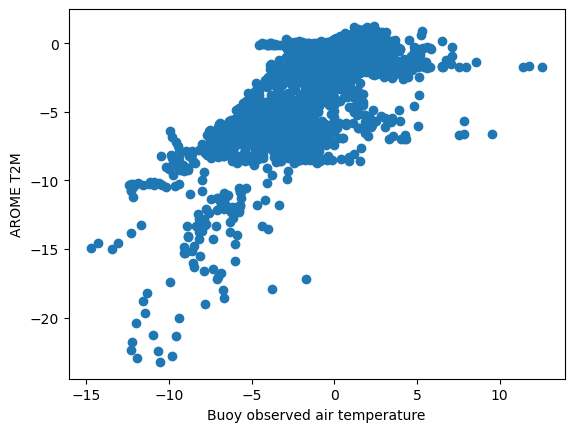

In [31]:
fig, ax = plt.subplots()
ax.scatter(buoys_above_90['temp_surf'], buoys_above_90['arome_t2m'])
ax.set_xlabel('Buoy observed air temperature')
ax.set_ylabel('AROME T2M')

50% <= SIC < 90%

In [8]:
buoys_between_5090 = buoys_df[(buoys_df['sic'] < .9) & (buoys_df['sic'] >= .5)]
print(buoys_between_5090.shape[0] / buoys_df.dropna().shape[0])

0.5261068971599929


In [9]:
print(buoys_between_5090[['arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice', 'temp_ice']].corr())

               arome_t2m  temp_air  temp_surf  temp_snow_ice  temp_ice
arome_t2m       1.000000  0.838298   0.651038       0.562220  0.324172
temp_air        0.838298  1.000000   0.851706       0.572990  0.279132
temp_surf       0.651038  0.851706   1.000000       0.545177  0.324728
temp_snow_ice   0.562220  0.572990   0.545177       1.000000  0.497982
temp_ice        0.324172  0.279132   0.324728       0.497982  1.000000


Text(0, 0.5, 'AROME T2M')

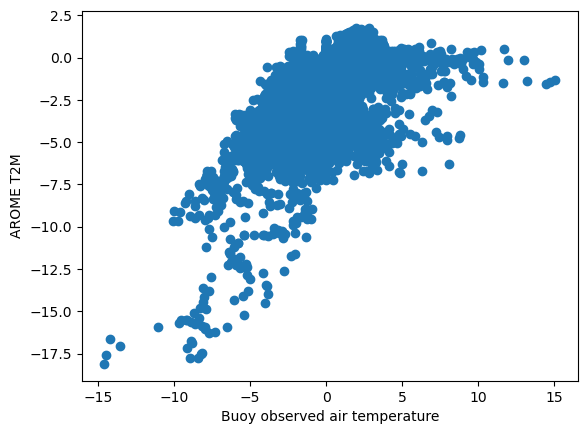

In [32]:
fig, ax = plt.subplots()
ax.scatter(buoys_between_5090['temp_surf'], buoys_between_5090['arome_t2m'])
ax.set_xlabel('Buoy observed air temperature')
ax.set_ylabel('AROME T2M')

10% <= SIC < 50%

In [10]:
buoys_between_1050 = buoys_df[(buoys_df['sic'] < .5) & (buoys_df['sic'] >= .1)]
print(buoys_between_1050.shape[0] / buoys_df.dropna().shape[0])

0.18398306579643675


In [11]:
print(buoys_between_1050[['arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice', 'temp_ice']].corr())

               arome_t2m  temp_air  temp_surf  temp_snow_ice  temp_ice
arome_t2m       1.000000  0.718296   0.462230       0.369915  0.590816
temp_air        0.718296  1.000000   0.823038       0.349534  0.548604
temp_surf       0.462230  0.823038   1.000000       0.343553  0.417105
temp_snow_ice   0.369915  0.349534   0.343553       1.000000  0.504593
temp_ice        0.590816  0.548604   0.417105       0.504593  1.000000


SIC < 10%

In [12]:
buoys_below_10 = buoys_df[buoys_df['sic'] < .1]
print(buoys_below_10.shape[0] / buoys_df.dropna().shape[0])

0.09331451755159641


In [14]:
print(buoys_below_10[['arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice', 'temp_ice']].corr())

               arome_t2m  temp_air  temp_surf  temp_snow_ice  temp_ice
arome_t2m       1.000000  0.324983   0.757262       0.183697  0.266096
temp_air        0.324983  1.000000   0.377806       0.223672  0.239024
temp_surf       0.757262  0.377806   1.000000       0.312936  0.357209
temp_snow_ice   0.183697  0.223672   0.312936       1.000000  0.372068
temp_ice        0.266096  0.239024   0.357209       0.372068  1.000000
